# Practice Problem - Radioactive Decay - Sample Solution

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

We start off by reading in the data

In [2]:
x, y, e = np.loadtxt('data/decay_data.txt', unpack=True)

And we can make a plot with error bars (and axis labels):

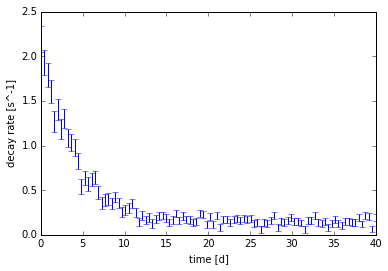

In [3]:
plt.errorbar(x, y, yerr=e, fmt="none")
plt.xlabel("time [d]")
plt.ylabel("decay rate [s^-1]")

We now use curve_fit to fit the data and print out the best-fit parameters and uncertainties:

In [4]:
from scipy.optimize import curve_fit

# Define function without background
def decay_rate(x, n_0, tau):
    return n_0 * np.exp(-(x / tau))

# Carry out the fit
popt1, pcov1 = curve_fit(decay_rate, x, y, sigma=e)

# Print out result
print("Initial fit (no background)")
print("N_0 =", popt1[0], "+/-", pcov1[0,0]**0.5, "s^-1")
print("tau =", popt1[1], "+/-", pcov1[1,1]**0.5, "days")

Initial fit (no background)
N_0 = 1.32124839902 +/- 0.105583955348 s^-1
tau = 8.88344297332 +/- 0.620223072222 days


We can now plot the best-fit model:

/Volumes/Raptor/Library/Python/3.4/lib/python/site-packages/matplotlib-1.4.x-py3.4-macosx-10.8-x86_64.egg/matplotlib/axes/_axes.py:2645: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


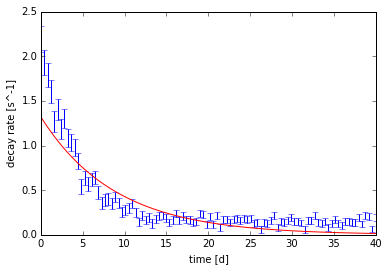

In [5]:
plt.errorbar(x, y, yerr=e, fmt=None)
plt.plot(x, decay_rate(x, popt1[0], popt1[1]), 'r-')
plt.xlabel("time [d]")
plt.ylabel("decay rate [s^-1]")

We can now repeat the fitting with a model that includes a background:

In [6]:
# Define function with background
def decay_rate_bkg(x, n_0, tau, n_bkg):
    return n_0 * np.exp(-(x / tau)) + n_bkg

# Carry out the fit
popt2, pcov2 = curve_fit(decay_rate_bkg, x, y, sigma=e)

# Print out result
print("Updated fit (with background)")
print("N_0 =", popt2[0], "+/-", pcov2[0,0]**0.5, "s^-1")
print("tau =", popt2[1], "+/-", pcov2[1,1]**0.5, "days")
print("N_bkg =", popt2[2], "+/-", pcov2[2,2]**0.5, "s^-1")

Updated fit (with background)
N_0 = 2.03895771012 +/- 0.0731325297778 s^-1
tau = 3.82202620563 +/- 0.146410551684 days
N_bkg = 0.146625000348 +/- 0.00533678834135 s^-1


and plotting the best-fit again, we see that the fit is much better:

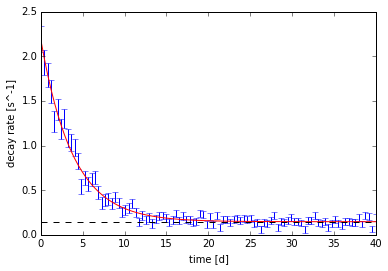

In [7]:
plt.errorbar(x, y, yerr=e, fmt=None)
plt.plot(x, decay_rate_bkg(x, popt2[0], popt2[1], popt2[2]), 'r-')
plt.axhline(popt2[2], ls='dashed', color='black')
plt.xlabel("time [d]")
plt.ylabel("decay rate [s^-1]")

In [8]:
def chi2(data, error, model):
    return np.sum((data - model)**2 / error**2)

print("Reduced chi^2:")
print("No background = ", chi2(y, e, decay_rate(x, popt1[0], popt1[1])) / (len(x) - 3.))
print("With background = ", chi2(y, e, decay_rate_bkg(x, popt2[0], popt2[1], popt2[2])) / (len(x) - 4.))

Reduced chi^2:
No background =  6.80430602397
With background =  1.05140379967


As we can see, the model with a background is a better fit!